In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [15]:
fraud=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\random forests\\Fraud_Check.csv")

In [16]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### checking for null values

In [17]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### There are no null values in the data

### Checking for duplicate values

In [18]:
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


### There are no duplicate values in data

### Distributions of the numerical features in the data

<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

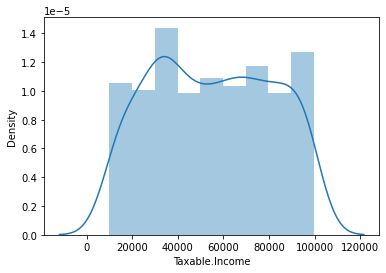

In [19]:
sns.distplot(fraud['Taxable.Income'])

<AxesSubplot:xlabel='City.Population', ylabel='Density'>

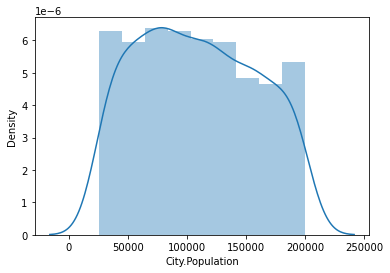

In [20]:
sns.distplot(fraud['City.Population'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

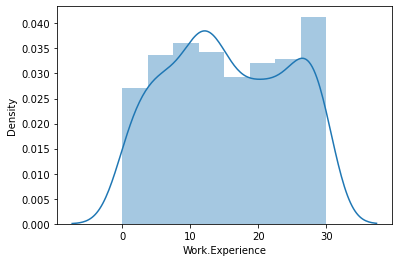

In [21]:
sns.distplot(fraud['Work.Experience'])

### Boxplots of the numerical features of the data

<AxesSubplot:xlabel='Taxable.Income'>

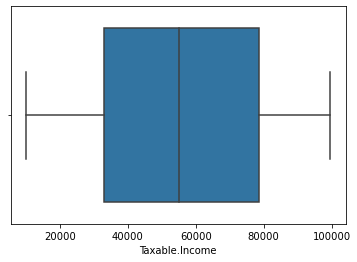

In [22]:
sns.boxplot(fraud['Taxable.Income'])

<AxesSubplot:xlabel='City.Population'>

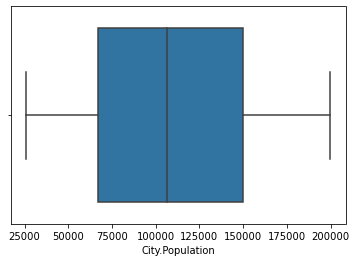

In [23]:
sns.boxplot(fraud['City.Population'])

<AxesSubplot:xlabel='Work.Experience'>

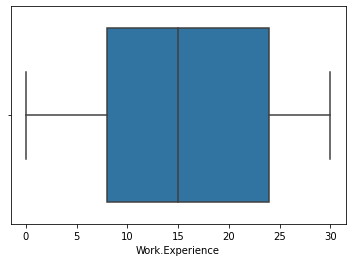

In [24]:
sns.boxplot(fraud['Work.Experience'])

### Making a new categorical column for taxable income

In [25]:
fraud['taxable_income_category']='risky'
fraud.loc[fraud['Taxable.Income']>30000,'taxable_income_category']='good'

In [26]:
fraud.taxable_income_category.value_counts()

good     476
risky    124
Name: taxable_income_category, dtype: int64

### Dropping the taxable income column

In [27]:
fraud_mod=fraud.drop(['Taxable.Income'],axis=1)
fraud_mod

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income_category
0,NO,Single,50047,10,YES,good
1,YES,Divorced,134075,18,YES,good
2,NO,Married,160205,30,YES,good
3,YES,Single,193264,15,YES,good
4,NO,Married,27533,28,NO,good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,good
596,YES,Divorced,55369,2,YES,good
597,NO,Divorced,154058,0,YES,good
598,YES,Married,180083,17,NO,good


### Using label encoder

In [28]:
le=preprocessing.LabelEncoder()
fraud_mod['Undergrad']=le.fit_transform(fraud_mod['Undergrad'])
fraud_mod['Marital.Status']=le.fit_transform(fraud_mod['Marital.Status'])
fraud_mod['taxable_income_category']=le.fit_transform(fraud_mod['taxable_income_category'])
fraud_mod['Urban']=le.fit_transform(fraud_mod['Urban'])

In [29]:
fraud_mod

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [30]:
fraud_mod.taxable_income_category.value_counts()

0    476
1    124
Name: taxable_income_category, dtype: int64

### Since the data is unbalanced, upsampling to make the data balanced

In [33]:
f=resample(fraud_mod[fraud_mod.taxable_income_category==1],n_samples=len(fraud_mod[fraud_mod.taxable_income_category==0]))

In [35]:
fraud_df=pd.concat([fraud_mod[fraud_mod.taxable_income_category==0],f])

In [36]:
fraud_df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
94,0,2,122705,6,1,1
491,0,0,82029,10,0,1
233,0,1,63701,19,1,1
357,0,1,84034,28,0,1


### Splitting independant and dependant variables

In [37]:
x=fraud_df.iloc[:,:-1]
y=fraud_df.iloc[:,-1]

### Building model and doing kfold cross validation

In [38]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=1000, max_features=5,criterion='entropy')
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8813048245614035


### Checking accuracy for different max_features

In [39]:
max_features=[]
accuracy=[]
for i in range(2,6):
    model = RandomForestClassifier(n_estimators=1000, max_features=i,criterion='entropy')
    results = cross_val_score(model, x, y, cv=kfold)
    max_features.append(i)
    accuracy.append(results.mean())
    
print(max_features[accuracy.index(np.max(accuracy))],np.max(accuracy))

3 0.8897587719298246


### different accuracy values for different max_features

In [40]:
for i in max_features:
    print(i,accuracy[max_features.index(i)])

2 0.8886842105263157
3 0.8897587719298246
4 0.8866008771929824
5 0.8833991228070175


### Maximum accuracy is achieved for 3 max features